<a href="https://colab.research.google.com/github/Tantatorn-dev/COVID19-Thailand/blob/master/covid19_thailand_timeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source
I retrieve data from [Thailand Department of Disease Control](https://covid19.th-stat.com/th/api)

# Data Preparation
ทดลองเอาข้อมูลสรุปตามช่วงเวลา (เริ่มตั้งแต่วันที่ 01/01/20) มาลองเล่นแร่แปรธาตุดู

In [2]:
import json
import requests

url = "https://covid19.th-stat.com/api/open/timeline"

# get response from api
res = requests.get(url)

# parse json object
json_data = res.json()
print(json_data)

{'UpdateDate': '12/04/2020 11:41', 'Source': 'https://covid19.th-stat.com/', 'DevBy': 'https://www.kidkarnmai.com/', 'SeverBy': 'https://smilehost.asia/', 'Data': [{'Date': '01/01/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/02/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/03/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/04/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/05/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/06/

In [3]:
# extract only designated data
json_data = json_data['Data']
print(json_data)

[{'Date': '01/01/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/02/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/03/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/04/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/05/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/06/2020', 'NewConfirmed': 0, 'NewRecovered': 0, 'NewHospitalized': 0, 'NewDeaths': 0, 'Confirmed': 0, 'Recovered': 0, 'Hospitalized': 0, 'Deaths': 0}, {'Date': '01/07

In [4]:
import pandas as pd

# keep the data in Pandas dataframe for easily usage
data = pd.DataFrame(json_data)
print(data)

           Date  NewConfirmed  NewRecovered  ...  Recovered  Hospitalized  Deaths
0    01/01/2020             0             0  ...          0             0       0
1    01/02/2020             0             0  ...          0             0       0
2    01/03/2020             0             0  ...          0             0       0
3    01/04/2020             0             0  ...          0             0       0
4    01/05/2020             0             0  ...          0             0       0
..          ...           ...           ...  ...        ...           ...     ...
98   04/08/2020           111            64  ...        888          1451      30
99   04/09/2020            54            52  ...        940          1451      32
100  04/10/2020            50            73  ...       1013          1427      33
101  04/11/2020            45           122  ...       1135          1348      35
102  04/12/2020            33            83  ...       1218          1295      38

[103 rows x 9 c

# Data Visualization
Let's plot some graphs

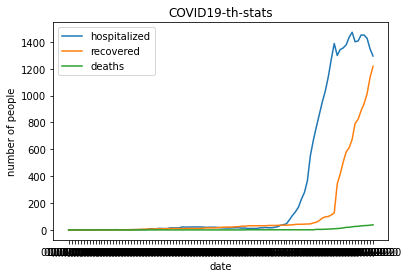

In [5]:
import matplotlib.pyplot as plt

# get only desired columns for plotting
# y-axis
recovered = data['Recovered']
hospitalized = data['Hospitalized']
deaths = data['Deaths']

# x-axis
date = data['Date']

# let's plot a lineplot
plt.figure()

plt.title('COVID19-th-stats')
plt.xlabel('date')
plt.ylabel('number of people')

plt.plot(date,hospitalized,label='hospitalized')
plt.plot(date,recovered,label='recovered')
plt.plot(date,deaths,label='deaths')
plt.legend()

plt.show()

We'll see that after 100 infections the rate was increasing so fast. But for now it's slower. There're also many recovered patients.

# Prediction
let's create a prediction model. Of course, this problem is a regression problem. I'm going to implement it using Keras.

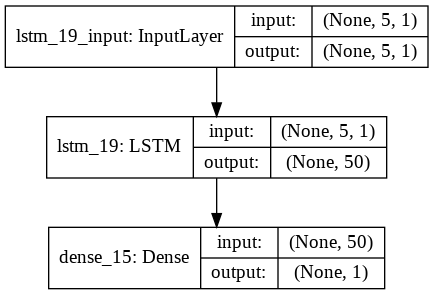

In [20]:
# I'm going to predict the number of hospitalized patients
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

seq = array(data['Hospitalized'])
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# choose a number of time steps
n_steps = 5

# split into samples
X, y = split_sequence(seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(Adam(0.001), loss='mse')

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
# let's train
model.fit(X,y,epochs=200)

Epoch 1/200
98/98 [==============================] - 0s 295us/step - loss: 310304.7254
Epoch 2/200
98/98 [==============================] - 0s 215us/step - loss: 303421.4745
Epoch 3/200
98/98 [==============================] - 0s 224us/step - loss: 288975.6117
Epoch 4/200
98/98 [==============================] - 0s 222us/step - loss: 282405.8329
Epoch 5/200
98/98 [==============================] - 0s 212us/step - loss: 281765.8316
Epoch 6/200
98/98 [==============================] - 0s 220us/step - loss: 250366.0746
Epoch 7/200
98/98 [==============================] - 0s 209us/step - loss: 226481.9736
Epoch 8/200
98/98 [==============================] - 0s 216us/step - loss: 122469.7867
Epoch 9/200
98/98 [==============================] - 0s 239us/step - loss: 49473.1963
Epoch 10/200
98/98 [==============================] - 0s 236us/step - loss: 22708.9784
Epoch 11/200
98/98 [==============================] - 0s 224us/step - loss: 21870.9485
Epoch 12/200
98/98 [========================